In [1]:
library(tidyverse)
library(ggplot2)
library(sf)
library(maptools)
library(sp)
library(rgdal)
library(raster)

── Attaching packages ────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘stringr’ was built under R version 4.0.5”
── Conflicts ───────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Linking to GEOS 3.9.1, GDAL 3.2.2, PROJ 8.0.0

Loading required package: sp

Checking rgeos availability: TRUE
Please note that 'maptools' will be retired by the end of 2023,
plan transition at your earliest convenience;
some functionality will be moved to 'sp'.

Warning message:
“package ‘rgdal’ was built under R version 4.0.5”
rgdal: version: 1.5-23, (SVN revision 1121)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.2.2, released 2021/03/05

## Genetic diversity 

Reading layer `Export_Output_5' from data source `/home/fhz/users/HMP/conservation_marine_animals/GD/git_hub/SHP/Export_Output_5.shp' using driver `ESRI Shapefile'
Simple feature collection with 3458 features and 10 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -180 ymin: -85.22194 xmax: 180 ymax: 89.97895
geographic CRS: StandardWorldMapCoordination
Reading layer `Base' from data source `/home/fhz/users/HMP/conservation_marine_animals/GD/git_hub/SHP/Base.shp' using driver `ESRI Shapefile'
replacing null geometries with empty geometries
Simple feature collection with 20806 features and 3 fields (with 66 geometries empty)
geometry type:  GEOMETRY
dimension:      XY
bbox:           xmin: -180 ymin: -89.45998 xmax: 180 ymax: 83.32401
geographic CRS: StandardWorldMapCoordination


Saving 6.67 x 6.67 in image



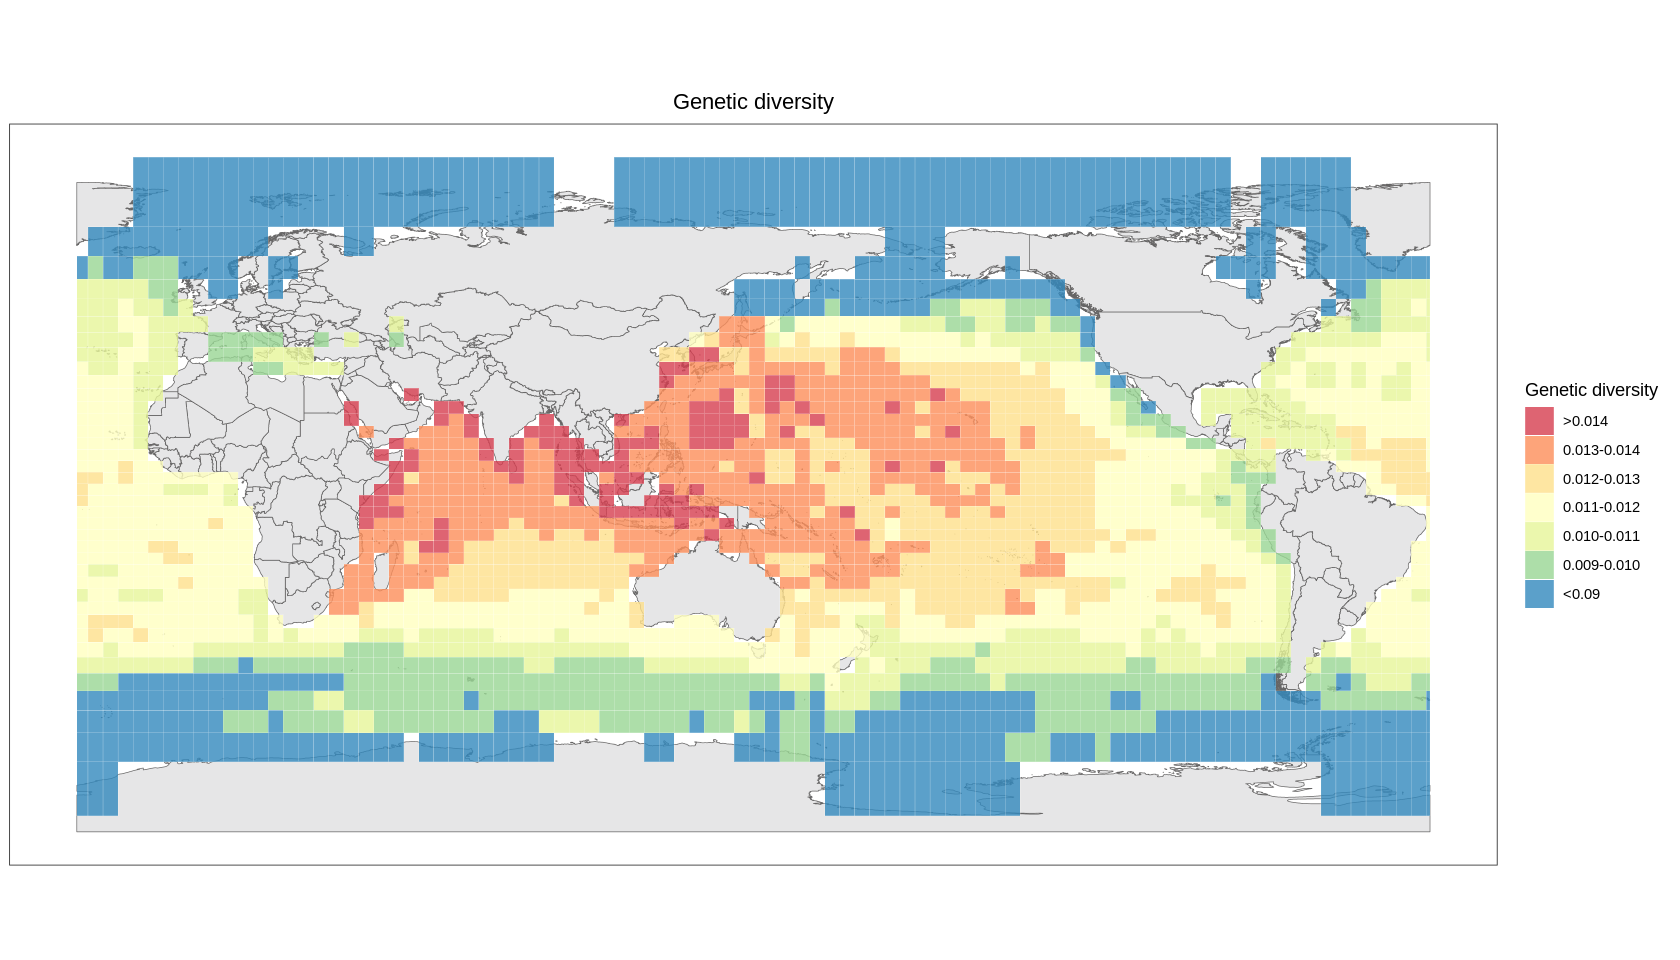

In [2]:
all <- read.csv("data_table_env_var_nes.csv")
equal_area_grid <- sf::st_read(dsn = "SHP//Export_Output_5.shp")
all_map <- left_join(all,equal_area_grid,by = 'grid_id')
land <- sf::st_read(dsn = "SHP//Base.shp")
all_map <-mutate(all_map,all_cut=cut(all_map$co1_genetic_diversity_mean,breaks=c(0,0.009,0.010,0.011,0.012,0.013,0.014,Inf),
                          labels=c('<0.09','0.009-0.010','0.010-0.011','0.011-0.012','0.012-0.013','0.013-0.014','>0.014')))
options(repr.plot.width=14, repr.plot.height=8)
ggplot()+geom_sf(data = land,aes(geometry = geometry),colour='#666565',fill='#e6e6e7',size=0.2)+
    geom_sf(data = all_map,aes(fill=all_cut,geometry = geometry),colour='white',alpha=0.8,size=0.05)+
    scale_fill_brewer(palette = "Spectral",direction = -1,name="Genetic diversity")+
    guides(fill = guide_legend(reverse=TRUE))+
    ggtitle("Genetic diversity")+
    theme_bw()+
    theme(panel.grid.major=element_blank(),
          panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5))
    ggsave("Co1_Genetic diversity.pdf")


## Species richness

Saving 6.67 x 6.67 in image



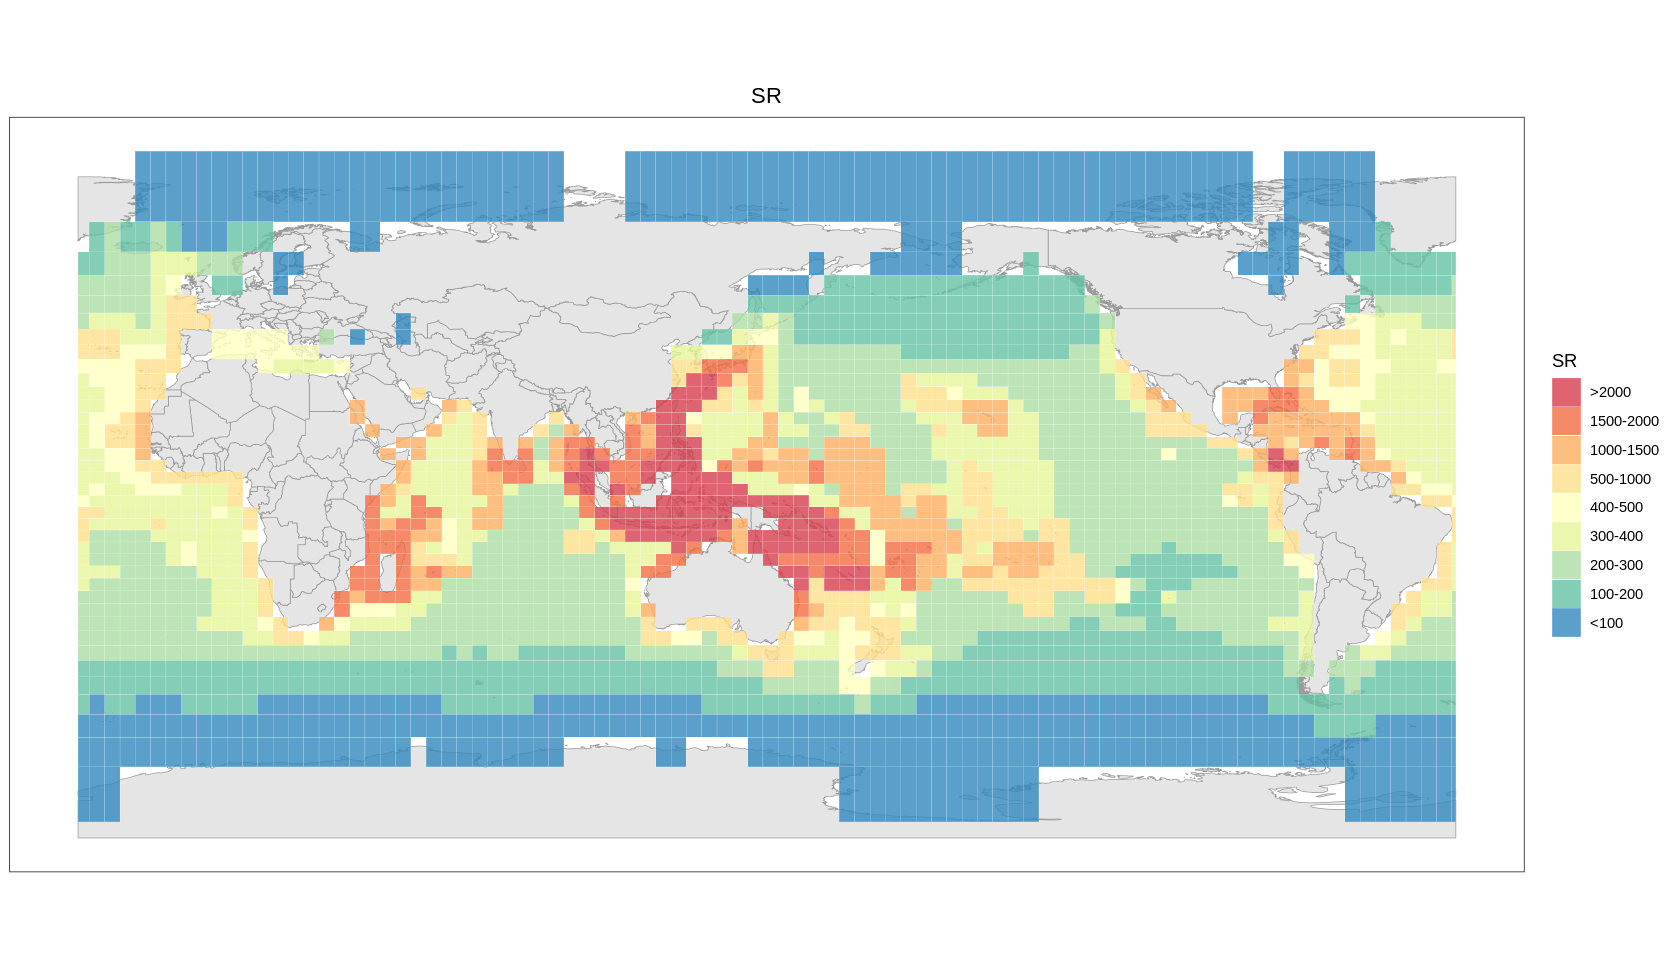

In [3]:
sr_map <- mutate(all_map,sr_cut=cut(all_map$marine_species_richness,breaks=c(0,100,200,300,400,500,1000,1500,2000,Inf),
                          labels=c('<100','100-200','200-300','300-400','400-500','500-1000','1000-1500','1500-2000','>2000')))
# head(pd_map)
ggplot()+geom_sf(data = land,aes(geometry = geometry),colour='grey60',fill='grey90',size=0.2)+
    geom_sf(data = sr_map,aes(fill=sr_cut,geometry = geometry),colour='white',alpha=0.8,size=0.05)+
    scale_fill_brewer(palette = "Spectral",direction = -1,name="SR")+
    guides(fill = guide_legend(reverse=TRUE))+
    ggtitle("SR")+
    theme_bw()+
    theme(panel.grid.major=element_blank(),
          panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5))
    ggsave("SR.pdf")

## Phylogenetic diversity

Saving 6.67 x 6.67 in image



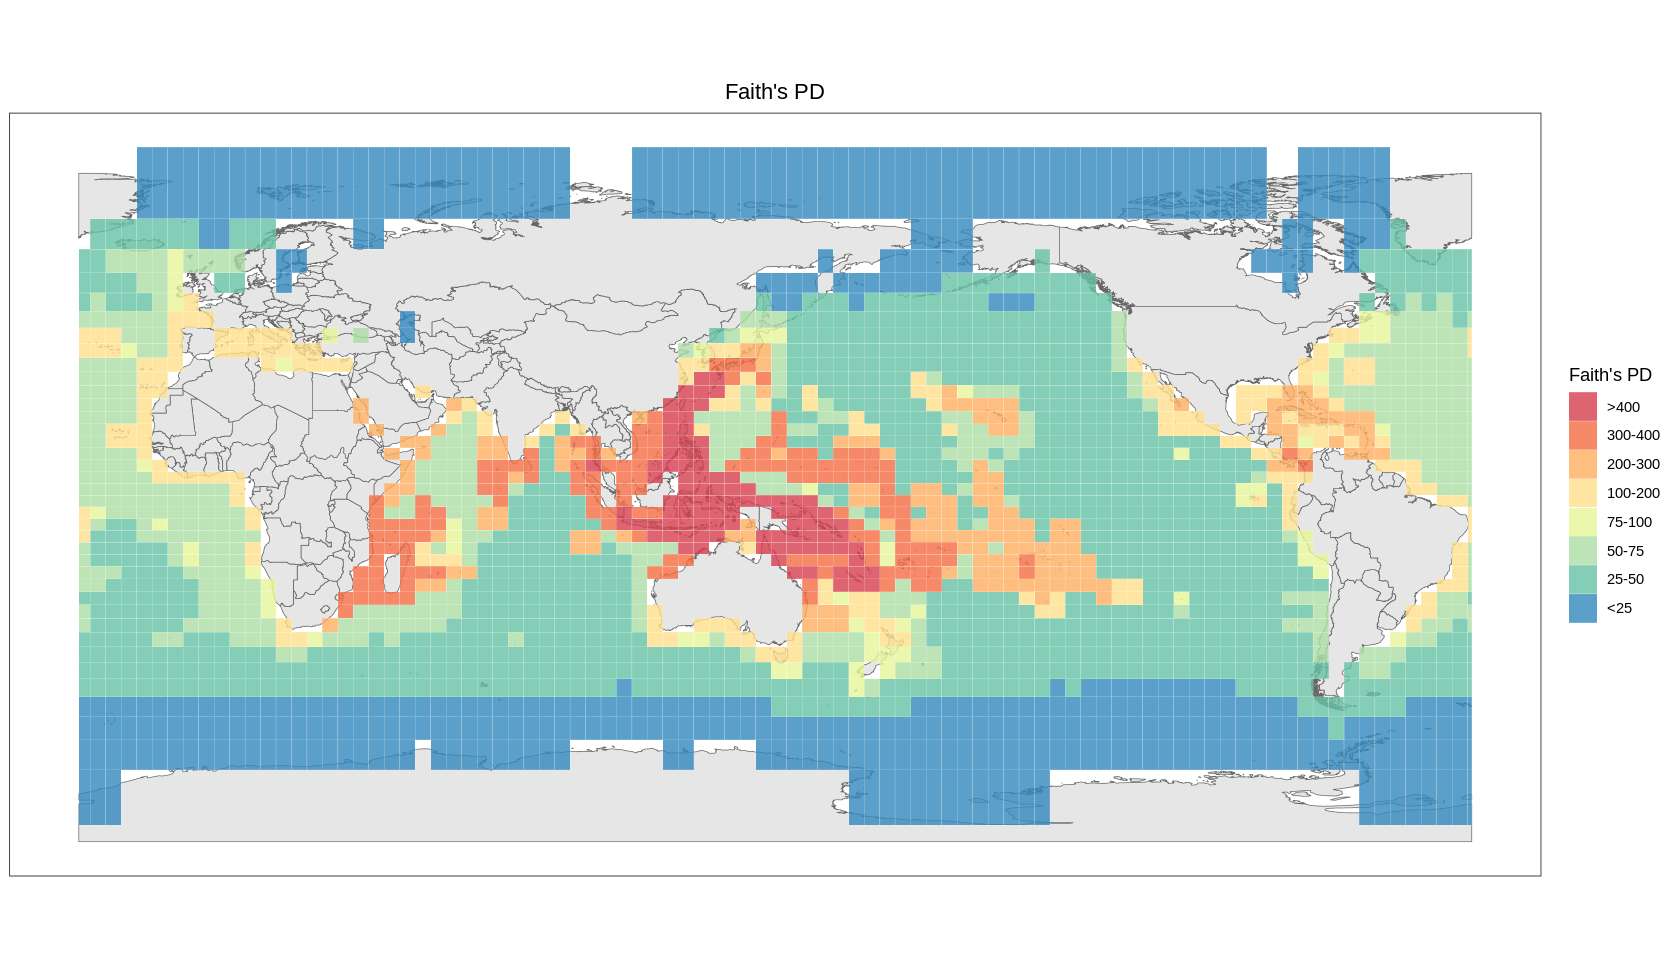

In [5]:
pd_map <- mutate(all_map,pd_cut=cut(all_map$PD,breaks=c(0,25,50,75,100,200,300,400,Inf),
                          labels=c('<25','25-50','50-75','75-100','100-200','200-300','300-400','>400')))
# head(pd_map)
ggplot()+geom_sf(data = land,aes(geometry = geometry),colour='#666565',fill='#e6e6e7',size=0.2)+
    geom_sf(data = pd_map,aes(fill=pd_cut,geometry = geometry),colour='white',alpha=0.8,size=0.05)+
    scale_fill_brewer(palette = "Spectral",direction = -1,name="Faith's PD")+
    guides(fill = guide_legend(reverse=TRUE))+
    ggtitle("Faith's PD")+
    theme_bw()+
    theme(panel.grid.major=element_blank(),
          panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5))
    ggsave("Faith's_PD.pdf")


## SES-PD

Reading layer `Base' from data source `/home/fhz/users/HMP/conservation_marine_animals/GD/git_hub/SHP/Base.shp' using driver `ESRI Shapefile'
replacing null geometries with empty geometries
Simple feature collection with 20806 features and 3 fields (with 66 geometries empty)
geometry type:  GEOMETRY
dimension:      XY
bbox:           xmin: -180 ymin: -89.45998 xmax: 180 ymax: 83.32401
geographic CRS: StandardWorldMapCoordination


Saving 6.67 x 6.67 in image



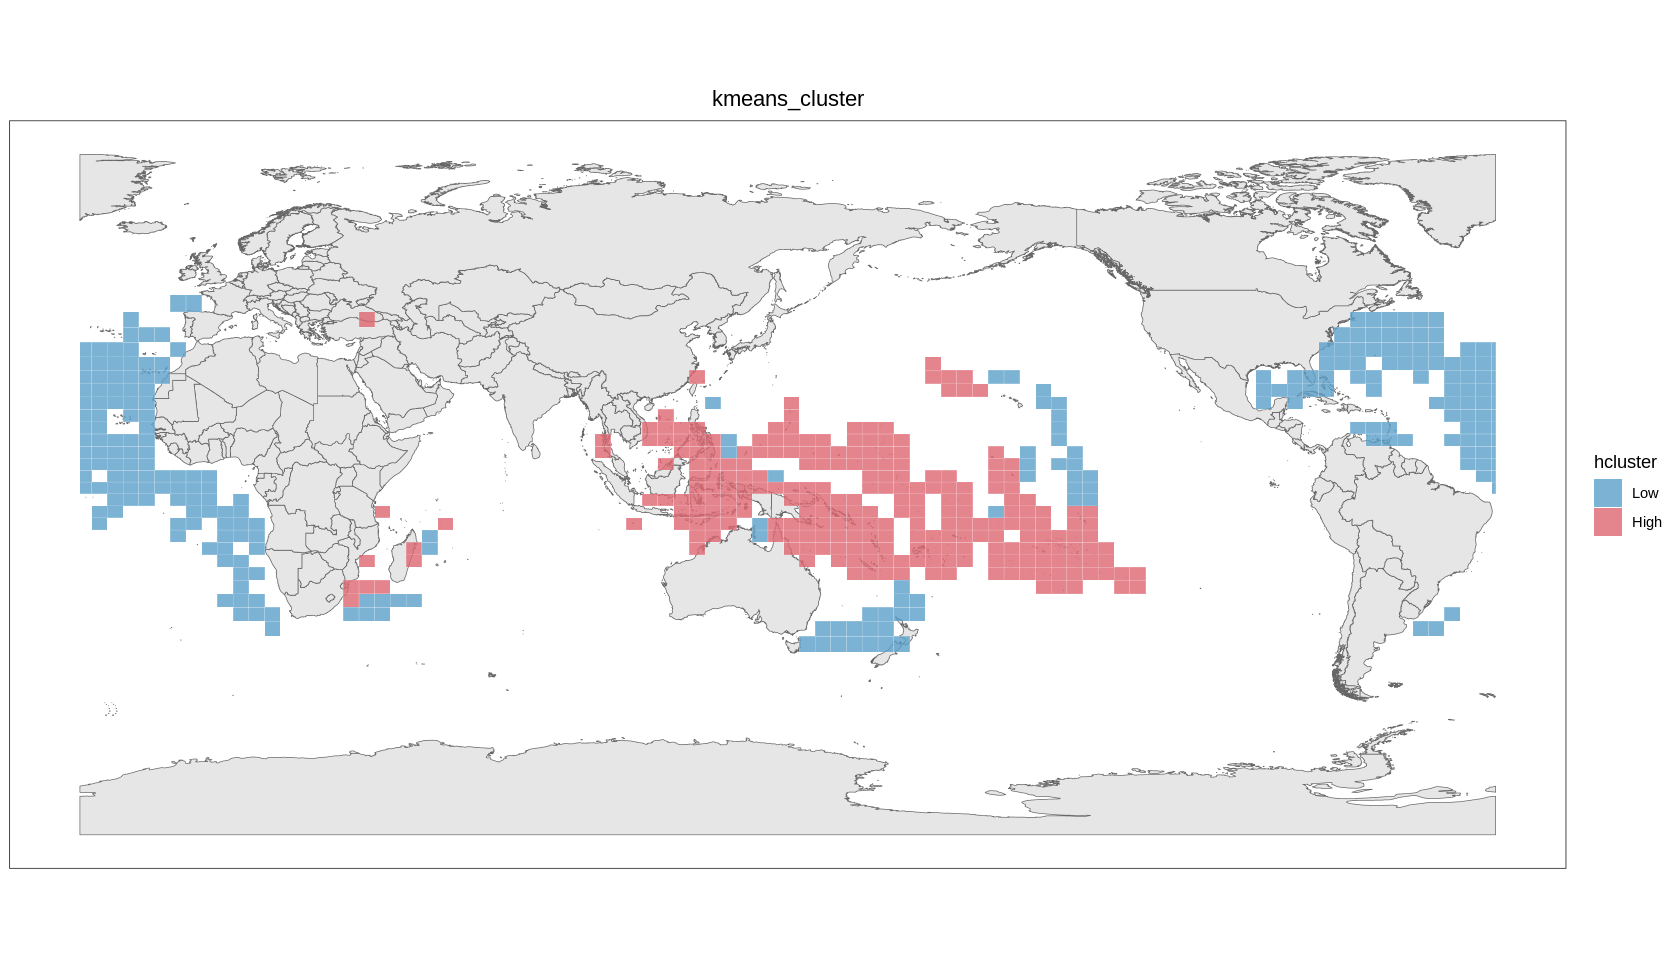

In [6]:
sespd <- read.csv("sespd_plot.csv")
sespd_map <- left_join(sespd,equal_area_grid,by = 'grid_id')
sespd_map$ses.pd.plot<- factor(sespd_map$ses.pd.plot,levels = c('High','Low'))
land <- sf::st_read(dsn = "SHP//Base.shp")
ggplot()+geom_sf(data = land,aes(geometry = geometry),colour='#666565',fill='#e6e6e7',size=0.2)+
    geom_sf(data = sespd_map,aes(fill=ses.pd.plot,geometry = geometry),colour='white',alpha=0.8,size=0.05)+
    scale_fill_manual(values = c('High' = "#dd6571",'Low' = "#5ba0c9"),name="hcluster")+
    guides(fill = guide_legend(reverse=TRUE))+
    ggtitle("kmeans_cluster")+
    theme_bw()+
    theme(panel.grid.major=element_blank(),
          panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5))
    ggsave("ses.pd.pdf")

## Priority protected areas

Saving 6.67 x 6.67 in image



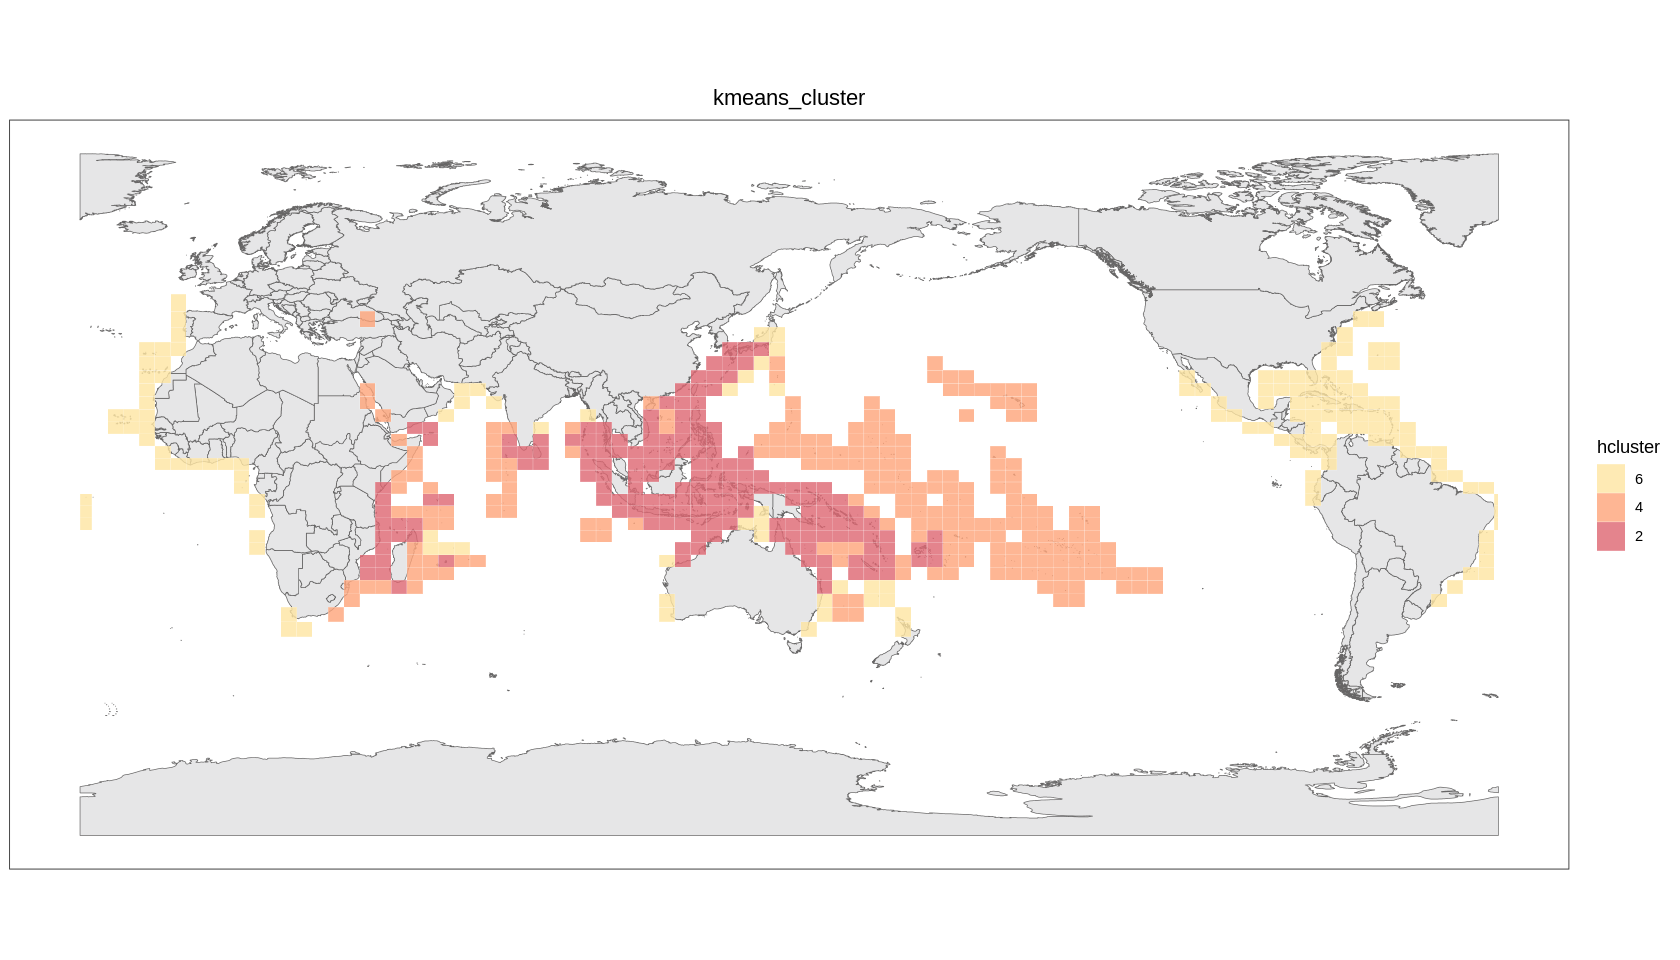

In [8]:
cluster <- read.csv("new_cluster_new.csv") 
score_map <- left_join(cluster,equal_area_grid,by = 'grid_id')
score_map$kmeans_cluster<- factor(score_map$kmeans_cluster,levels = c(2,4,6))
ggplot()+geom_sf(data = land,aes(geometry = geometry),colour='#666565',fill='#e6e6e7',size=0.2)+
    geom_sf(data = score_map,aes(fill=kmeans_cluster,geometry = geometry),colour='white',alpha=0.8,size=0.05)+
    scale_fill_manual(values = c('2' = "#dd6571",'4' = "#fda479",'6' = "#fde5a1"),name="hcluster")+
    guides(fill = guide_legend(reverse=TRUE))+
    ggtitle("kmeans_cluster")+
    theme_bw()+
    theme(panel.grid.major=element_blank(),
          panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5))
    ggsave("kmeans_cluster_map_new.pdf")